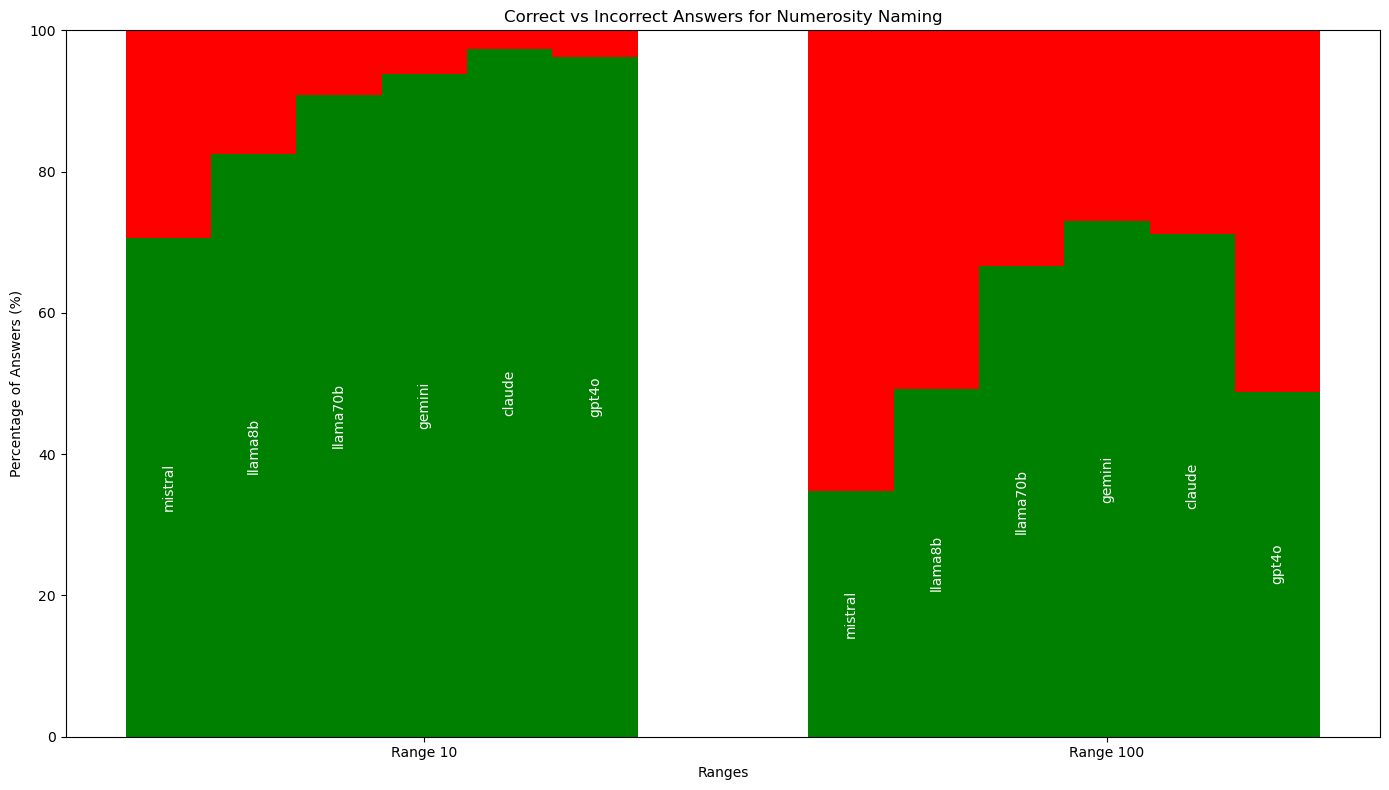

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the CSV files
folder_path = r"C:\Users\Kaan\Desktop\thesis\csv_files"

# Dictionary to store results
results = {}

# Iterate through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith("naming_data.csv"):
        # Extract model, category, and range from the file name
        parts = file_name.split("_")
        model = parts[0]
        category = int(parts[1].replace("cat", ""))
        range_value = int(parts[2].replace("r", ""))

        # Read the CSV file
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path, index_col=0)

        # Check correctness by comparing each cell value to the first value (target)
        target_values = data.iloc[0, :]
        correct_counts = (data == target_values).sum(axis=0).sum()
        total_counts = data.size
        incorrect_counts = total_counts - correct_counts

        # Add the results to the dictionary
        if range_value not in results:
            results[range_value] = {"mistral": {"Correct": 0, "Incorrect": 0},
                                    "llama8b": {"Correct": 0, "Incorrect": 0},
                                    "llama70b": {"Correct": 0, "Incorrect": 0},
                                    "gemini": {"Correct": 0, "Incorrect": 0},
                                    "claude": {"Correct": 0, "Incorrect": 0},
                                    "gpt4o": {"Correct": 0, "Incorrect": 0}}

        results[range_value][model]["Correct"] += correct_counts
        results[range_value][model]["Incorrect"] += incorrect_counts

# Prepare data for visualization
ranges = sorted(results.keys())
models = ["mistral", "llama8b", "llama70b", "gemini", "claude",  "gpt4o"]

# Create a stacked bar chart
correct_data = []
incorrect_data = []

for range_value in ranges:
    for model in models:
        correct_data.append(results[range_value][model]["Correct"])
        incorrect_data.append(results[range_value][model]["Incorrect"])

# Convert data to numpy arrays for easy plotting
correct_data = np.array(correct_data).reshape(len(ranges), len(models))
incorrect_data = np.array(incorrect_data).reshape(len(ranges), len(models))
# Normalize data to percentages
correct_percent = correct_data / (correct_data + incorrect_data) * 100
incorrect_percent = incorrect_data / (correct_data + incorrect_data) * 100

# Plot
bar_width = 0.25
x = np.arange(len(ranges)) * 2.0  # Increase spacing between ranges by multiplying more

plt.figure(figsize=(14, 8))

for i, model in enumerate(models):
    for j, range_value in enumerate(ranges):
        bar_position = x[j] + (i - len(models) / 2) * bar_width
        # Plot stacked bars as percentages
        plt.bar(bar_position, correct_percent[j, i], width=bar_width, color="green")
        plt.bar(bar_position, incorrect_percent[j, i], width=bar_width, bottom=correct_percent[j, i], color="red")
        # Write model names vertically on the correct answers side
        plt.text(
            bar_position, 
            correct_percent[j, i] / 2, 
            model, 
            ha='center', 
            va='center', 
            color='white', 
            fontsize=10, 
            rotation=90
        )

# Add custom x-axis labels for ranges
plt.xticks(x, [f"Range {r}" for r in ranges])

plt.xlabel("Ranges")
plt.ylabel("Percentage of Answers (%)")
plt.title("Correct vs Incorrect Answers for Numerosity Naming")
plt.ylim(0, 100)  # Set y-axis limit to 100%
plt.tight_layout()
plt.show()



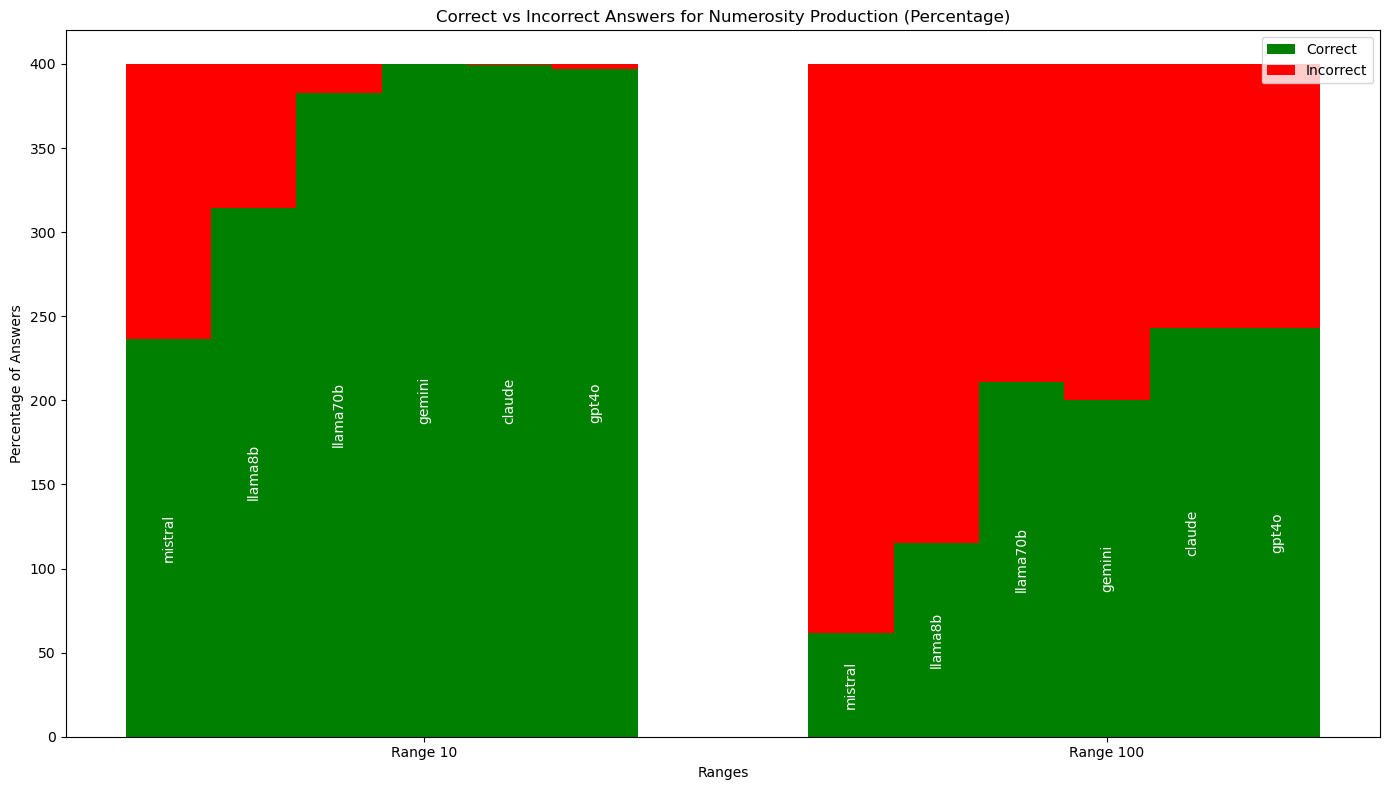

In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Directory containing the CSV files
folder_path = r"C:\Users\Kaan\Desktop\thesis\csv_files"

# Dictionary to store results
results = {}

# Iterate through each CSV file in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith("gen_data.csv"):
        # Extract model, category, and range from the file name
        parts = file_name.split("_")
        model = parts[0]
        category = int(parts[1].replace("cat", ""))
        range_value = int(parts[2].replace("r", ""))

        # Read the CSV file
        file_path = os.path.join(folder_path, file_name)
        data = pd.read_csv(file_path, index_col=0)

        # Check correctness by comparing each cell value to the first value (target)
        target_values = data.iloc[0, :]
        correct_counts = (data == target_values).sum(axis=0).sum()
        total_counts = data.size
        incorrect_counts = total_counts - correct_counts

        # Calculate percentages
        correct_percentage = (correct_counts / total_counts) * 100
        incorrect_percentage = (incorrect_counts / total_counts) * 100

        # Add the results to the dictionary
        if range_value not in results:
            results[range_value] = {"mistral": {"Correct": 0, "Incorrect": 0},
                                    "llama8b": {"Correct": 0, "Incorrect": 0},
                                    "llama70b": {"Correct": 0, "Incorrect": 0},
                                    "gemini": {"Correct": 0, "Incorrect": 0},
                                    "claude": {"Correct": 0, "Incorrect": 0},
                                    "gpt4o": {"Correct": 0, "Incorrect": 0}}

        results[range_value][model]["Correct"] += correct_percentage
        results[range_value][model]["Incorrect"] += incorrect_percentage

# Prepare data for visualization
ranges = sorted(results.keys())
models = ["mistral", "llama8b", "llama70b", "gemini", "claude", "gpt4o"]

# Create a stacked bar chart
correct_data = []
incorrect_data = []

for range_value in ranges:
    for model in models:
        correct_data.append(results[range_value][model]["Correct"])
        incorrect_data.append(results[range_value][model]["Incorrect"])

# Convert data to numpy arrays for easy plotting
correct_data = np.array(correct_data).reshape(len(ranges), len(models))
incorrect_data = np.array(incorrect_data).reshape(len(ranges), len(models))

# Plot
bar_width = 0.25
x = np.arange(len(ranges)) * 2.0  # Increase spacing between ranges by multiplying more

plt.figure(figsize=(14, 8))

for i, model in enumerate(models):
    for j, range_value in enumerate(ranges):
        bar_position = x[j] + (i - len(models) / 2) * bar_width
        plt.bar(bar_position, correct_data[j, i], width=bar_width, color="green", label="Correct" if j == 0 and i == 0 else "")
        plt.bar(bar_position, incorrect_data[j, i], width=bar_width, bottom=correct_data[j, i], color="red", label="Incorrect" if j == 0 and i == 0 else "")
        # Write model names vertically with larger font size on the correct answers side
        plt.text(bar_position, correct_data[j, i] / 2, model, ha='center', va='center', color='white', fontsize=10, rotation=90)

# Add custom x-axis labels for ranges
plt.xticks(x, [f"Range {r}" for r in ranges])

plt.xlabel("Ranges")
plt.ylabel("Percentage of Answers")
plt.title("Correct vs Incorrect Answers for Numerosity Production (Percentage)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()
